## Gather the data

In [21]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd

import matplotlib.pyplot as plt
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [22]:
def compute_ddg(dg_A, dg_B):
    return dg_A * KT_KCALMOL - dg_B * KT_KCALMOL

def compute_error(ddg_A, ddg_B):
    return (ddg_A**2 + ddg_B**2)**0.5 * KT_KCALMOL

In [23]:
# Retrieve free energies

main_dir = 46
sub_dirs = range(0, 40)
d_results = {}
for sub_dir in sub_dirs:
    d_results[sub_dir] = {}
    for phase in ['apo']:
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_0/{phase}_free_energy_bootstrapped_5ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir][phase] = results


In [24]:
# Format the data appropriately for cinnabar

titles = ["Y2F", "Y2A", "W2F", "T2A", "E2A", "D2A", "K2A", "R2A", "R2Q", "H2A", "F2Y", "A2Y", "F2W", "A2T", "A2E", "A2D", "A2K", "A2R", "Q2R", "A2H"]

to_plot = []

for sub_dir in range(20):
    ddg = compute_ddg(d_results[sub_dir]['apo']["Deltaf"][0, -1], d_results[sub_dir + 20]['apo']["Deltaf"][0, -1])
    dddg = compute_error(d_results[sub_dir]['apo']["dDeltaf"][0, -1], d_results[sub_dir + 20]['apo']["dDeltaf"][0, -1])
    if sub_dir in range(10):
        to_plot.append([titles[sub_dir][:-1], titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg, dddg, 0])
    else:
        to_plot.append(["-" + titles[sub_dir][:-1], "-" + titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg * -1, dddg, 0])

        

In [25]:
to_plot

[['Y2', 'F2', -0.10121102903710621, 0.4140353007079988, 0],
 ['Y2', 'A2', 0.3508123716529141, 0.6632097200922006, 0],
 ['W2', 'F2', 0.11712044561038137, 0.5973934701491681, 0],
 ['T2', 'A2', 0.6229643428291887, 0.24876010036017082, 0],
 ['E2', 'A2', 5.17223245778151, 1.1207890224890658, 0],
 ['D2', 'A2', 5.208504548425116, 1.0483202081649463, 0],
 ['K2', 'A2', -1.7267837486030544, 1.272070526637543, 0],
 ['R2', 'A2', -1.3869832094545131, 1.4848343638767603, 0],
 ['R2', 'Q2', -1.534010294583421, 1.5387147670719497, 0],
 ['H2', 'A2', 1.082459559075243, 0.5526831464857882, 0],
 ['-F2', '-Y2', -0.173986778217472, 0.4238618772195386, 0],
 ['-A2', '-Y2', 0.41964169883727465, 0.7044965953175217, 0],
 ['-F2', '-W2', 0.26159967382035976, 0.6339152321835387, 0],
 ['-A2', '-T2', 0.625825807625823, 0.21530970073485886, 0],
 ['-A2', '-E2', 5.0641074360495395, 1.3016363063435372, 0],
 ['-A2', '-D2', 4.7827578396668, 1.2602367334755546, 0],
 ['-A2', '-K2', -1.5804063676078641, 1.0609977949361724, 0],

In [26]:
# Get the discrepancy between forward and negative reverse DDGs (including 95% CI error bars)

labels_internal_consistency = []
for i in range(10):
    discrepancy = round(to_plot[i][2] - to_plot[i+10][2], 2)
    forward_ddg = round(to_plot[i][2], 2)
    reverse_ddg = round(to_plot[i+10][2], 2)
    forward_ci = [round(to_plot[i][2] - to_plot[i][3], 2), round(to_plot[i][2] + to_plot[i][3])]
    reverse_ci = [round(to_plot[i+10][2] - to_plot[i+10][3], 2), round(to_plot[i+10][2] + to_plot[i+10][3])]
    forward_ci_extended = [forward_ci[0] - 1, forward_ci[1] + 1]
    reverse_ci_extended = [reverse_ci[0] - 1, reverse_ci[1] + 1]
    is_within_error = (forward_ci_extended[0] <= reverse_ddg and reverse_ddg <= forward_ci_extended[1]) or (reverse_ci_extended[0] <= forward_ddg and forward_ddg <= reverse_ci_extended[1])
    print(to_plot[i][0:2], discrepancy, forward_ddg, forward_ci, reverse_ddg, reverse_ci, is_within_error)
    if not is_within_error:
        labels_internal_consistency.append(titles[i])
    else:
        labels_internal_consistency.append("")
    

['Y2', 'F2'] 0.07 -0.1 [-0.52, 0] -0.17 [-0.6, 0] True
['Y2', 'A2'] -0.07 0.35 [-0.31, 1] 0.42 [-0.28, 1] True
['W2', 'F2'] -0.14 0.12 [-0.48, 1] 0.26 [-0.37, 1] True
['T2', 'A2'] -0.0 0.62 [0.37, 1] 0.63 [0.41, 1] True
['E2', 'A2'] 0.11 5.17 [4.05, 6] 5.06 [3.76, 6] True
['D2', 'A2'] 0.43 5.21 [4.16, 6] 4.78 [3.52, 6] True
['K2', 'A2'] -0.15 -1.73 [-3.0, 0] -1.58 [-2.64, -1] True
['R2', 'A2'] 0.33 -1.39 [-2.87, 0] -1.71 [-2.94, 0] True
['R2', 'Q2'] 0.17 -1.53 [-3.07, 0] -1.7 [-2.91, 0] True
['H2', 'A2'] 0.26 1.08 [0.53, 2] 0.82 [0.37, 1] True


In [27]:
# Format data for cinnabar test
x = [round(entry[2], 3) for i, entry in enumerate(to_plot) if i < 10] # forward
y = [round(entry[2], 3) for i, entry in enumerate(to_plot) if i >= 10] # reverse
xerr =  [round(entry[3], 3) for i, entry in enumerate(to_plot) if i < 10] # forward
yerr = [round(entry[3], 3) for i, entry in enumerate(to_plot) if i >= 10] # reverse
x_data = np.asarray(x)
y_data = np.asarray(y)
print(x)
print(y)
print(xerr)
print(yerr)

[-0.101, 0.351, 0.117, 0.623, 5.172, 5.209, -1.727, -1.387, -1.534, 1.082]
[-0.174, 0.42, 0.262, 0.626, 5.064, 4.783, -1.58, -1.712, -1.699, 0.822]
[0.414, 0.663, 0.597, 0.249, 1.121, 1.048, 1.272, 1.485, 1.539, 0.553]
[0.424, 0.704, 0.634, 0.215, 1.302, 1.26, 1.061, 1.231, 1.208, 0.456]


In [28]:
# Get labels for charge mutations only
labels_charges = []
for i in range(10):
    if i in [4, 5, 6, 7, 8, 9]:
        labels_charges.append(titles[i])
    else:
        labels_charges.append("")

## -Reverse vs Forward plot

In [10]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from cinnabar import plotting, stats, wrangle

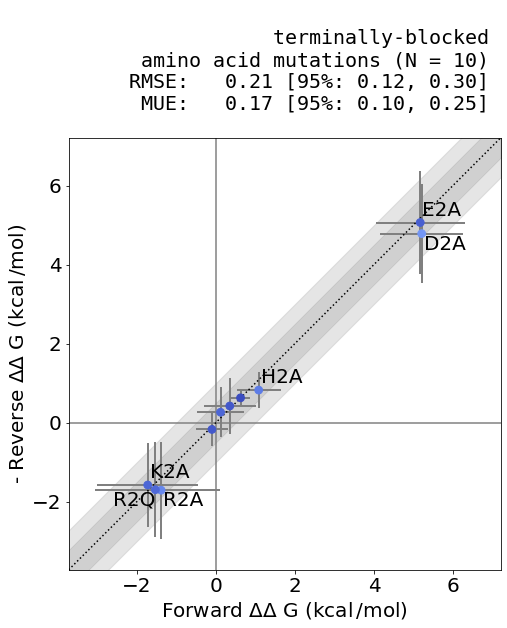

In [20]:
# Format the data appropriately
x = [entry[2] for i, entry in enumerate(to_plot) if i < 10] # forward
y = [entry[2] for i, entry in enumerate(to_plot) if i >= 10] # reverse
xerr =  [entry[3] for i, entry in enumerate(to_plot) if i < 10] # forward
yerr = [entry[3] for i, entry in enumerate(to_plot) if i >= 10] # reverse
x_data = np.asarray(x)
y_data = np.asarray(y)

# Generate the plot
filename = '/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_plot_5ns_dipeptide.pdf'
plot = plotting._master_plot(
    x_data,
    y_data,
    xerr=xerr,
    yerr=yerr,
    filename=filename,
    title="",
    target_name="terminally-blocked \namino acid mutations",
    xlabel="Forward",
    ylabel="- Reverse",
    units=r'$\mathrm{kcal\,/mol}$', 
    figsize=10, 
    dpi=500,
    axis_padding=2.0,
    data_labels=labels_charges,
    font_sizes={"title":20, "labels": 20, "other": 20},
    scatter_kwargs={'s': 60}
)


## Table

In [31]:
# Format the data appropriately for table

titles = ["Y2F", "Y2A", "W2F", "T2A", "E2A", "D2A", "K2A", "R2A", "R2Q", "H2A", "F2Y", "A2Y", "F2W", "A2T", "A2E", "A2D", "A2K", "A2R", "Q2R", "A2H"]

to_plot = []

for sub_dir in range(20):
    ddg = compute_ddg(d_results[sub_dir]['apo']["Deltaf"][0, -1], d_results[sub_dir + 20]['apo']["Deltaf"][0, -1])
    dddg = compute_error(d_results[sub_dir]['apo']["dDeltaf"][0, -1], d_results[sub_dir + 20]['apo']["dDeltaf"][0, -1])
    if sub_dir in range(10):
        to_plot.append([titles[sub_dir], round(ddg, 2), round(dddg, 2), 5, 5, "forward"])
    else:
        to_plot.append([titles[sub_dir], round(ddg, 2), round(dddg, 2), 5, 5, "reverse"])


In [35]:
df = pd.DataFrame(to_plot, columns=["Mutation", r"Predicted $\Delta\Delta$G (kcal/mol)", "Error (kcal/mol)", "ACE-X-NME phase simulation time (ns/replica)", "ALA-X-ALA phase simulation time (ns/replica)", "Mutation direction"])

In [36]:
df

,Mutation,Predicted $\Delta\Delta$G (kcal/mol),Error (kcal/mol),ACE-X-NME phase simulation time (ns/replica),ALA-X-ALA phase simulation time (ns/replica),Mutation direction
0,Y2F,-0.10,0.41,5,5,forward
1,Y2A,0.35,0.66,5,5,forward
2,W2F,0.12,0.60,5,5,forward
3,T2A,0.62,0.25,5,5,forward
4,E2A,5.17,1.12,5,5,forward
5,D2A,5.21,1.05,5,5,forward
6,K2A,-1.73,1.27,5,5,forward
7,R2A,-1.39,1.48,5,5,forward
8,R2Q,-1.53,1.54,5,5,forward
9,H2A,1.08,0.55,5,5,forward


In [37]:
df.to_csv("/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/table_terminally_blocked.csv", index=False)